In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML_Lab/stroke_detection.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].fillna(value = df.bmi.mean(), inplace = True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df=pd.get_dummies(df,columns=["gender","work_type","ever_married","Residence_type","smoking_status"],drop_first=True)

In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,0,1,0,0,1,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,0,1,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
x=df.loc[:,df.columns!="age"]

In [ ]:
y=df["age"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3029,28932,0,0,67.29,36.7,0,0,0,0,1,0,0,1,0,1,0,0
2277,37150,0,0,83.53,48.5,0,0,0,0,1,0,0,1,0,1,0,0
3002,71669,0,0,65.16,30.8,0,1,0,0,1,0,0,1,0,0,1,0
246,27153,0,0,78.80,29.3,1,0,0,0,0,1,0,1,0,1,0,0
2825,58235,0,0,58.65,25.6,0,1,0,0,1,0,0,1,1,0,0,1


In [ ]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [ ]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_train_pred=regtree.predict(x_train)
y_test_pred=regtree.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_test_pred)

194.30020607518418

In [ ]:
dot_data= tree.export_graphviz(regtree,out_file=None)

In [ ]:
from IPython.display import Image
import pydotplus

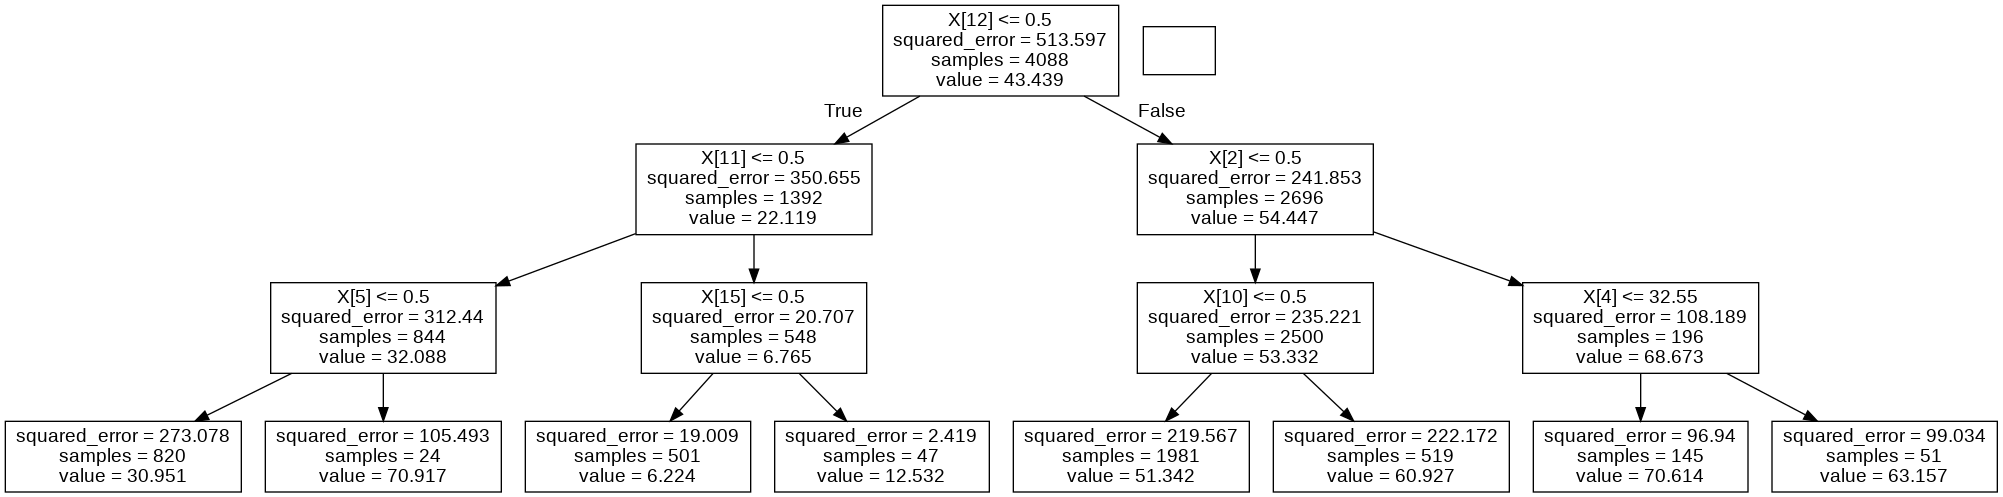

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

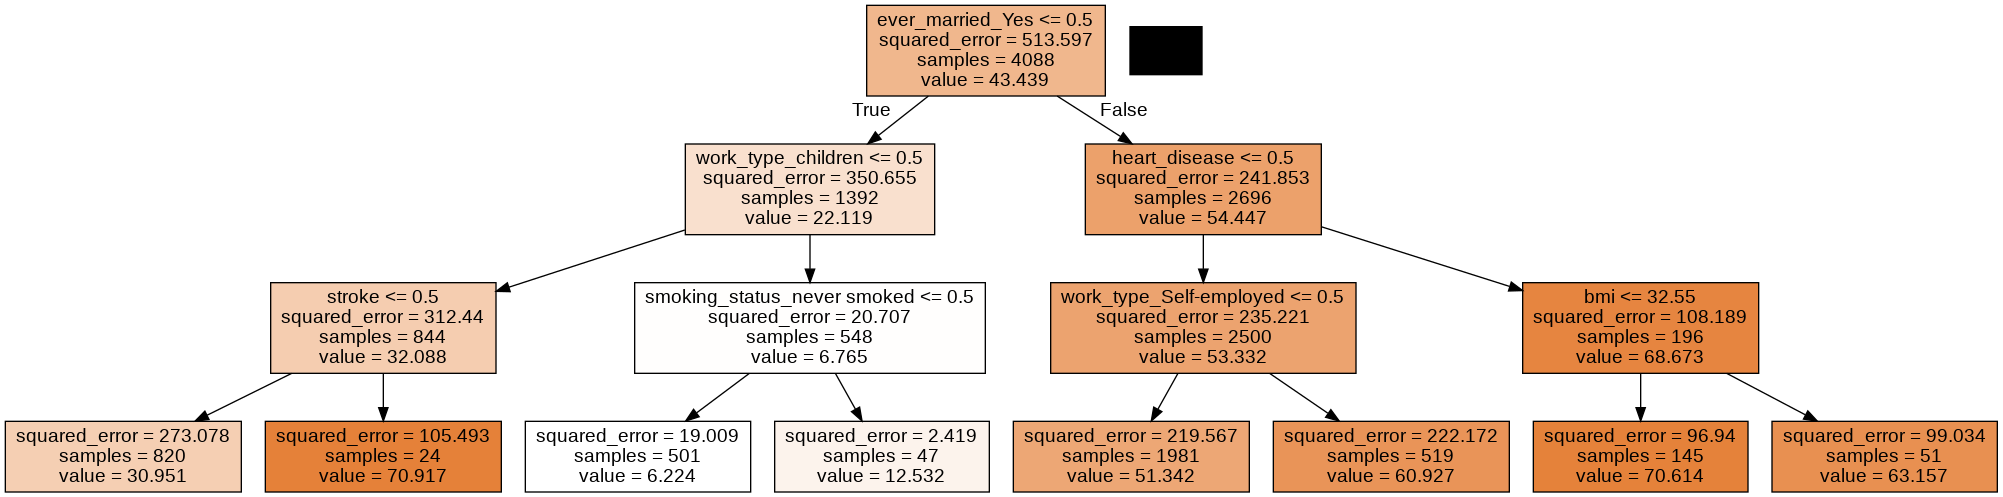

In [ ]:
regtree1= tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled=True)
import pydotplus
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

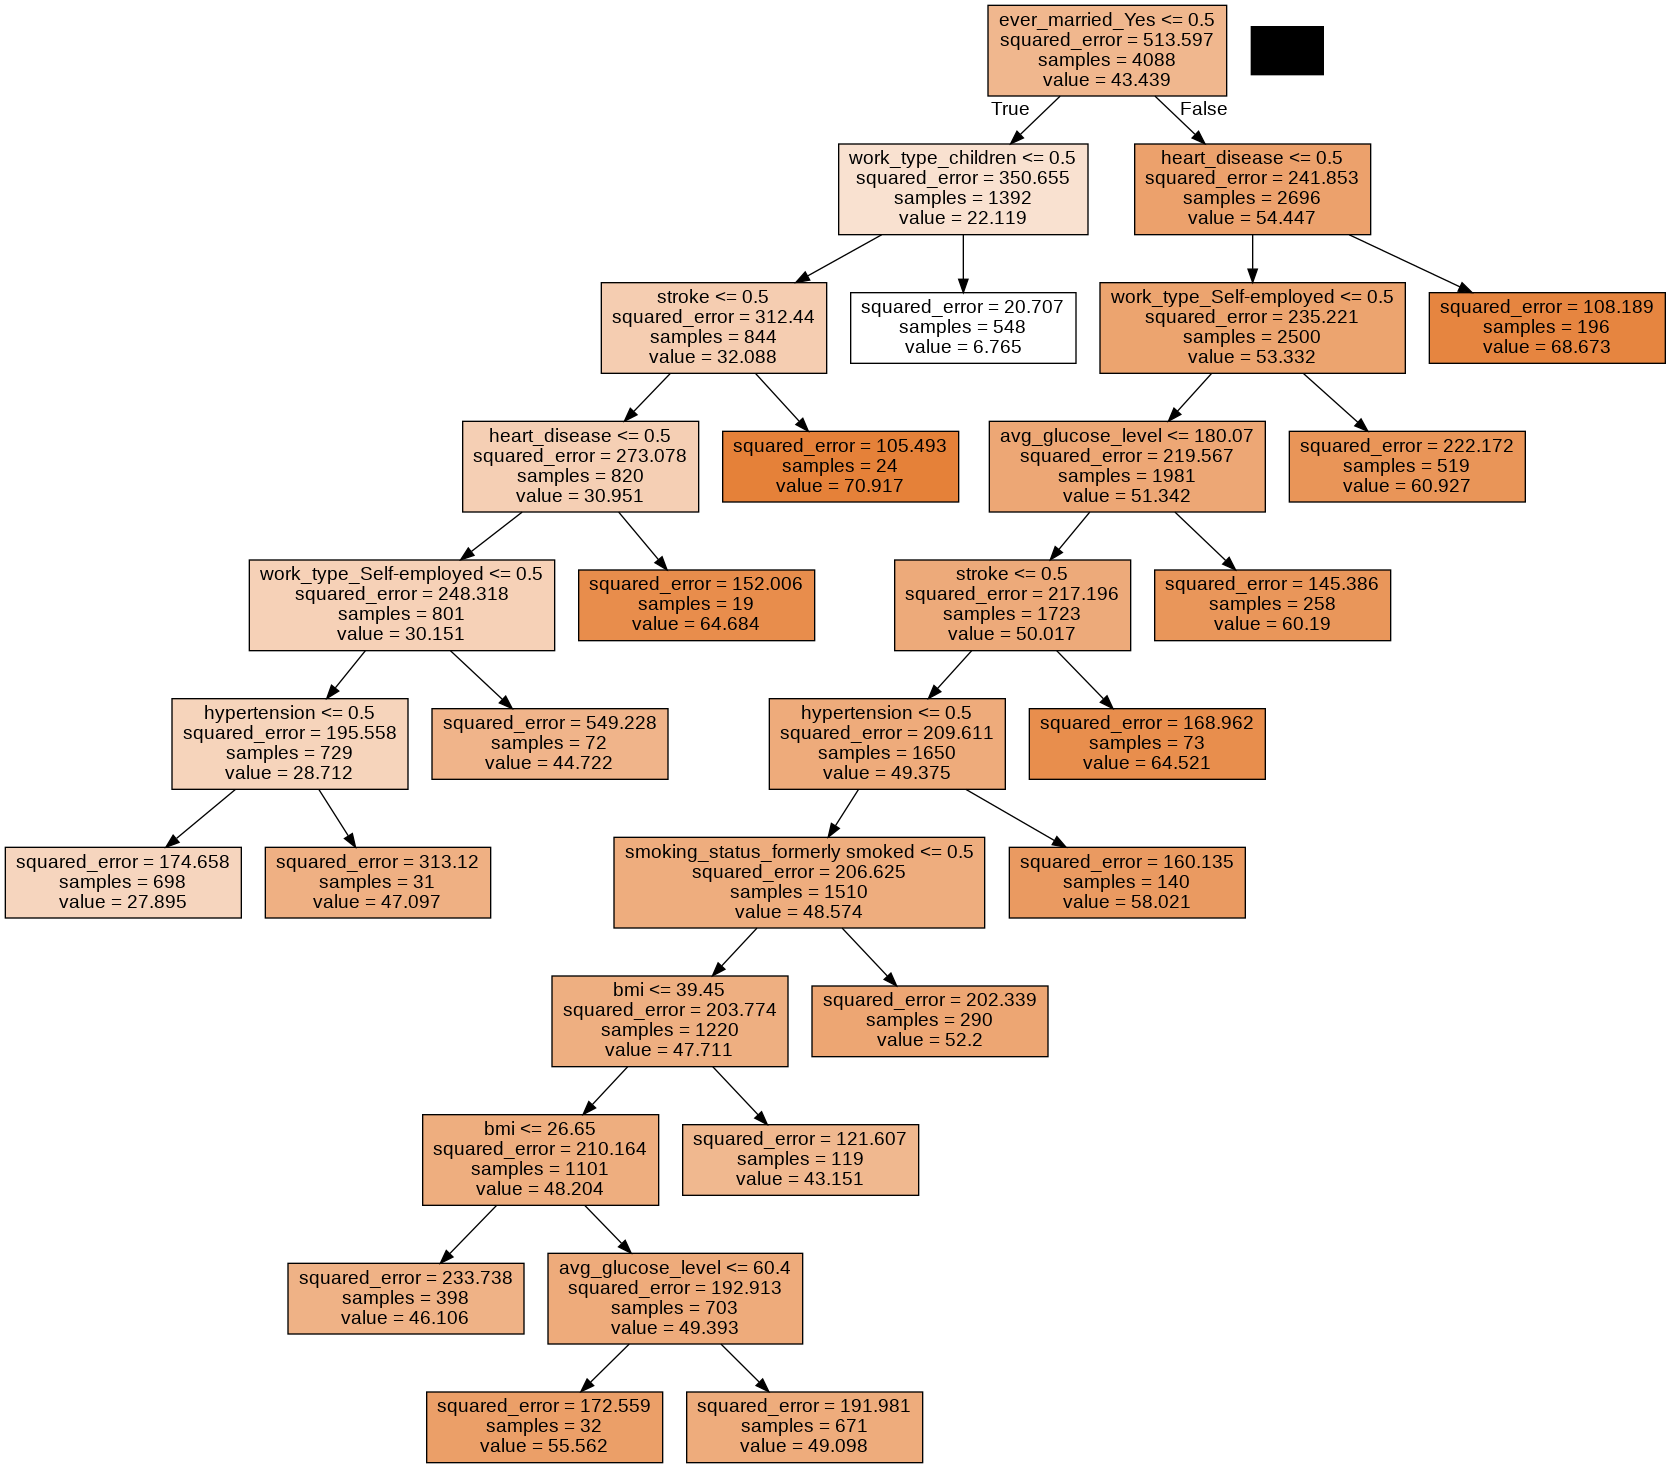

In [ ]:
regtree2= tree.DecisionTreeRegressor(min_samples_split=700)
regtree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree2,out_file=None,feature_names=x_train.columns,filled=True)
import pydotplus
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())


In [ ]:
df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,0,1,0,0,1,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,0,1,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
[1, 4, 5]

[1, 4, 5]

In [ ]:
df.interpolate(method = 'linear', inplace = True)
df.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
ever_married_Yes                  0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

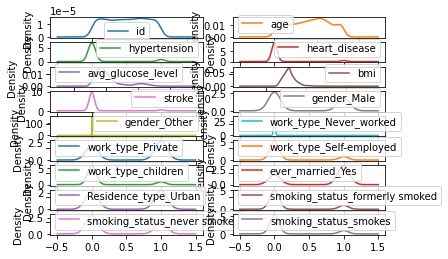

In [ ]:
df.plot(kind='density',subplots=True,layout=(9, 2),sharex=False)
plt.show()

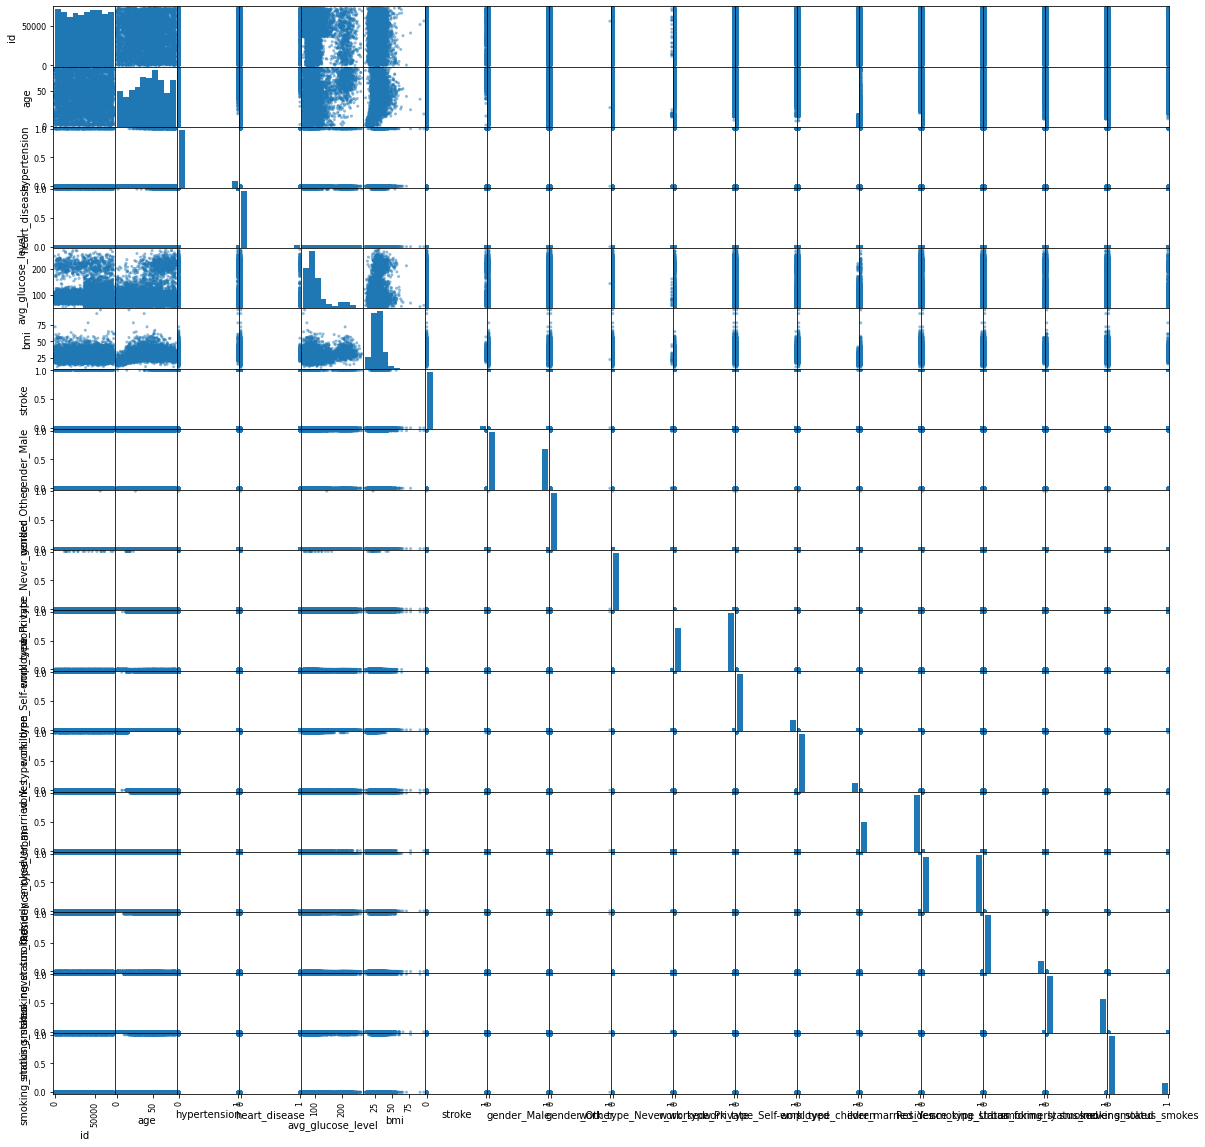

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20))
plt.show()

In [ ]:
X = df.iloc[: , [1, 4]].values
y = df.iloc[: , [5]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.32824306, -0.86023092],
       [-0.41649391, -0.50170259],
       [ 0.73076708, -0.90725464],
       ...,
       [ 0.02476032, -0.25488321],
       [-0.9901244 ,  0.32419302],
       [ 0.64251624, -1.03176818]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
print(errors)

43.859726900694724


In [ ]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
print(errors)

6.622667657424365


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


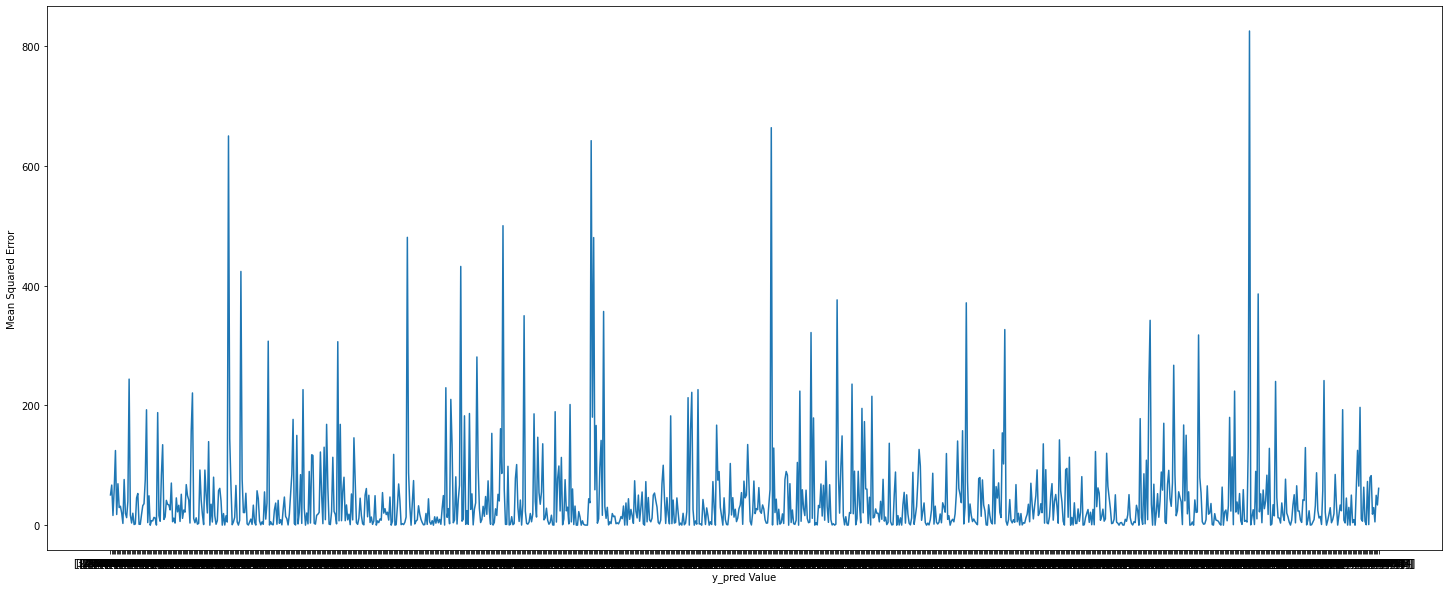

In [ ]:
errors = []
for i in range(len(y_test)):
	# calculate error
	err = (y_test[i] - y_pred[i])**2
	# store error
	errors.append(err)
	# report error
	#print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
plt.figure(figsize=(25,10))
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
plt.xlabel('y_pred Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)
print(errors)

5.142895603978074


In [ ]:
results = pd.DataFrame()
results['Actual bmi'] = np.around(y_test.flatten(), decimals = 1)
results['Predicted bmi'] = np.around(y_pred.flatten(), decimals = 1)
results

,Actual bmi,Predicted bmi
0,26.4,33.5
1,16.7,24.9
2,25.9,29.9
3,34.1,26.3
4,13.7,24.9
...,...,...
1017,22.9,28.3
1018,27.9,30.2
1019,36.2,29.1
1020,28.9,34.7
